C:\Users\naman\AppData\Local\Temp\ipykernel_79276\3036083378.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weight_Category', palette='deep')


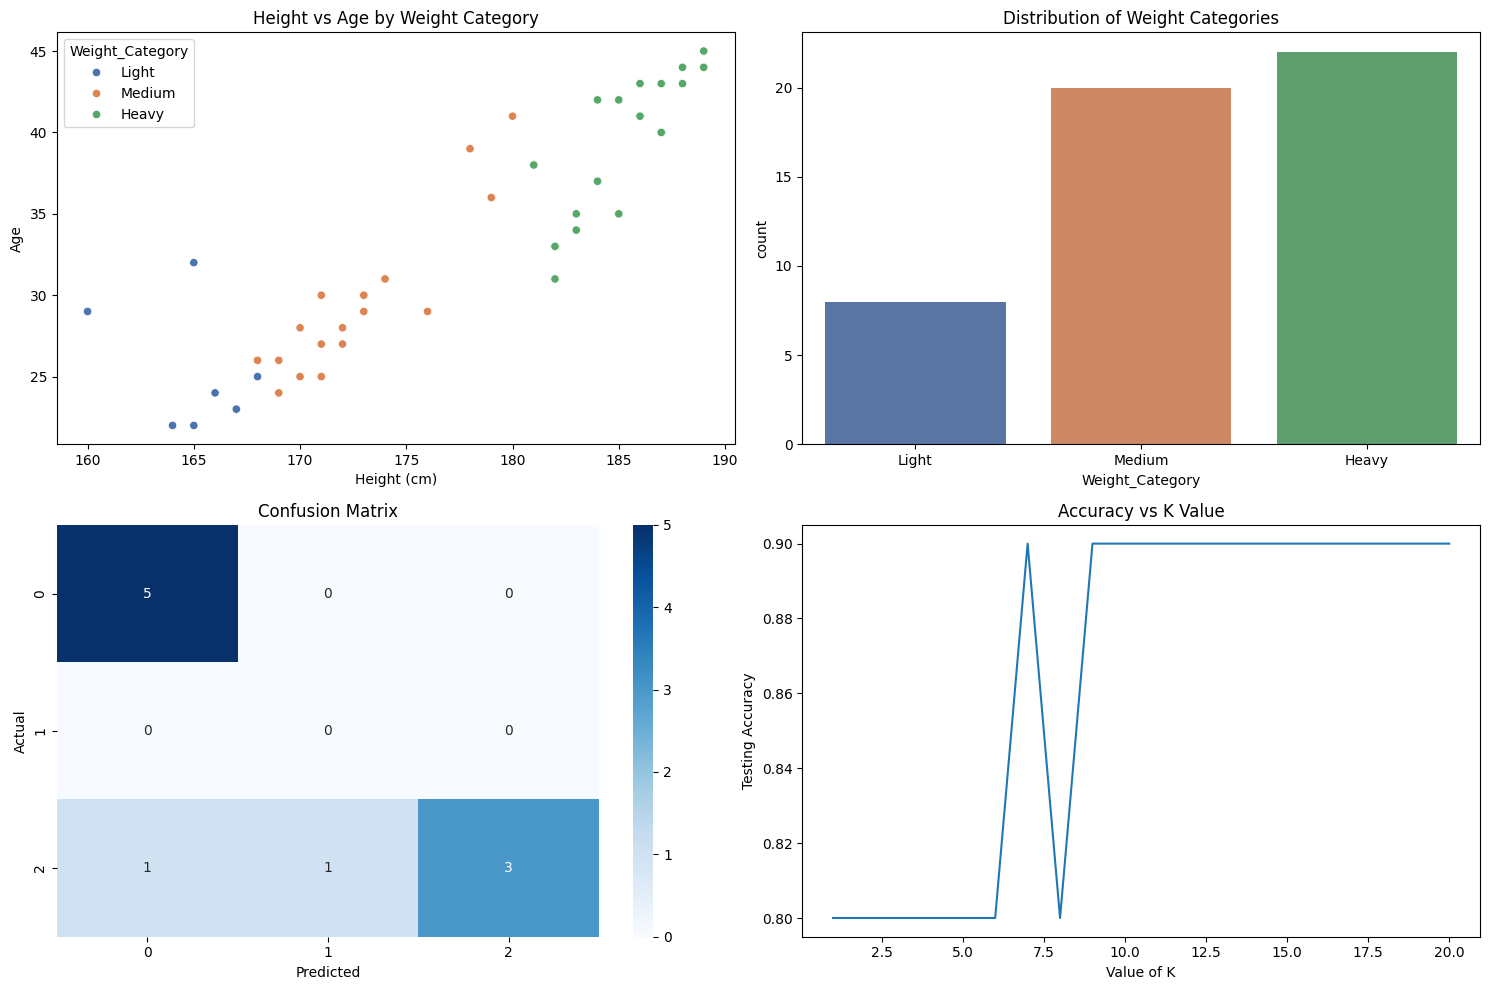


Classification Report:
              precision    recall  f1-score   support

       Heavy       0.83      1.00      0.91         5
       Light       0.00      0.00      0.00         0
      Medium       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.61      0.53      0.55        10
weighted avg       0.92      0.80      0.83        10


Model Accuracy: 0.80

Example Prediction:
A person with height 175cm and age 30 years is predicted to be in the Medium weight category


c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('user_records.csv')

# Data Preprocessing
# Let's create a classification problem by categorizing people into weight categories
df['Weight_Category'] = pd.cut(df['Weight (kg)'], 
                             bins=[0, 60, 75, 100],
                             labels=['Light', 'Medium', 'Heavy'])

# Selecting features for classification
X = df[['Height (cm)', 'Age']]
y = df['Weight_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
k = 5  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Visualizations
plt.figure(figsize=(15, 10))

# 1. Scatter plot of Height vs Age with Weight Categories
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Height (cm)', y='Age', hue='Weight_Category', palette='deep')
plt.title('Height vs Age by Weight Category')

# 2. Distribution of Weight Categories
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Weight_Category', palette='deep')
plt.title('Distribution of Weight Categories')

# 3. Confusion Matrix Heatmap
plt.subplot(2, 2, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 4. Finding optimal K value
k_range = range(1, 21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.subplot(2, 2, 4)
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy vs K Value')

plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nModel Accuracy: {accuracy:.2f}")

# Function to predict weight category for new data
def predict_weight_category(height, age):
    new_data = np.array([[height, age]])
    new_data_scaled = scaler.transform(new_data)
    prediction = knn.predict(new_data_scaled)
    return prediction[0]

# Example prediction
print("\nExample Prediction:")
height = 175
age = 30
predicted_category = predict_weight_category(height, age)
print(f"A person with height {height}cm and age {age} years is predicted to be in the {predicted_category} weight category")